<a href="https://colab.research.google.com/github/AshiniAnantharaman/NeuralNetwork/blob/main/Stochastic_Batch_and_Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/homeprices_bangalore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [ ]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
np.ones(shape=(2))

array([1., 1.])

# BATCH GRADIENT DESCENT

In [ ]:
def batch_gradient_descent(X, y_actual, epochs, learning_rate = 0.01):
  num_of_features = X.shape[1]
  
  w = np.ones(shape = (num_of_features))
  b = 0
  total_samples = X.shape[0]
  cost_list = list()
  epoch_list = list()
  for i in range(epochs):
    y_predicted = np.dot(w, np.transpose(X)) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_actual - y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_actual - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_actual - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w , b , cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

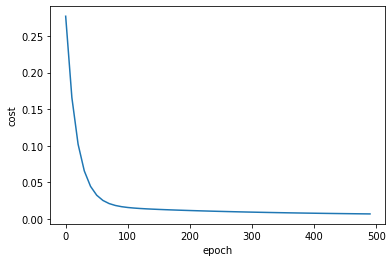

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [ ]:
sx.transform([[2600,4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.62068966, 0.75      ]])

In [ ]:
w

array([0.70712464, 0.67456527])

In [ ]:
sy.inverse_transform([[1,0.5,0]])

array([[167. ,  99.5,  32. ]])

In [ ]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.45484403267596

In [ ]:
predict(1000, 2, w, b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


30.253094462442355

# STOCHASTIC GRADIENT DESCENT

In [ ]:
import random
random.randint(0,6)

5

In [ ]:
def stochastic_gradient_descent(X, y_actual, epochs, learning_rate = 0.01):
  num_of_features = X.shape[1]
  
  w = np.ones(shape = (num_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = list()
  epoch_list = list()

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_actual[random_index]

    y_predicted = np.dot(w, np.transpose(sample_x)) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
    b_grad = -(2/total_samples)*(sample_y - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y - y_predicted)

    if i%100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w , b , cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.7081788 , 0.67719701]), -0.23085632748676413, 0.000340545296542916)

In [ ]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

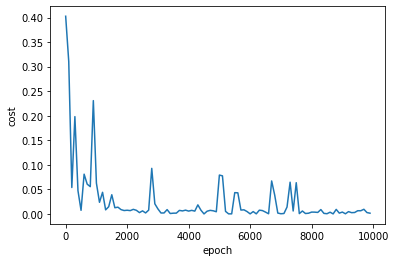

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [ ]:
predict(2600, 4, w_sgd, b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.7410922600741

In [ ]:
predict(1600, 3, w_sgd, b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


72.91874912270363

# MINI BATCH GRADIENT DESCENT

In [ ]:
from pandas.core.internals.construction import to_arrays
def mini_batch_gradient_descent(X, y_actual, epochs, batch_size = 5, learning_rate = 0.01):
  num_of_features = X.shape[1]
  
  w = np.ones(shape = (num_of_features))
  b = 0
  total_samples = X.shape[0]

  if batch_size > total_samples:
    batch_size = total_samples

  cost_list = list()
  epoch_list = list()

  num_batches = int(total_samples/batch_size)

  for i in range(epochs):
    random_index = np.random.permutation(total_samples)
    tmp_x = X[random_index]
    tmp_y = y_actual[random_index]
    
    for j in range(0, total_samples, batch_size):
      x_sample = tmp_x[j:j+batch_size]
      y_sample = tmp_y[j:j+batch_size]
      y_predicted = np.dot(w, np.transpose(x_sample)) + b

    w_grad = -(2/len(x_sample))*(x_sample.T.dot(y_sample - y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_sample - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_sample - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w , b , cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 120)
w_mbgd, b_mbgd, cost_mbgd

(array([0.74562867, 0.67021163]), -0.14283350819802476, 0.006005519294745873)

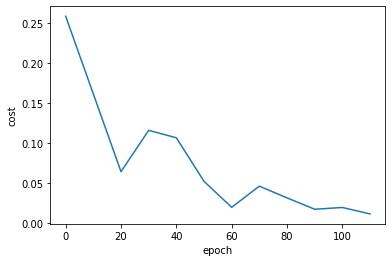

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd, cost_list_mbgd)

In [ ]:
predict(1000,2,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


30.253094462442355

In [ ]:
predict(1500,3,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


69.47860785714694